# *D.E.S. - Discrete-event simulation*

Informação : *https://en.wikipedia.org/wiki/Discrete-event_simulation*

---

In [1]:
import random
import networkx as nx

Geração de grafos conectados (tal como foi feito no **guião nº 1**).

In [2]:
def completeGraph(nVertices):
    # Initialize the graph
    G = nx.Graph()

    # Add nodes
    G.add_nodes_from(range(nVertices))

    # List all possible edges
    edges = list(nx.non_edges(G))
    random.shuffle(edges)
    while not nx.is_connected(G):
        x, y = edges.pop()
        G.add_edge(x, y)

    return G

Classe *Node* :

In [3]:
class Node:
    def __init__(self, tag, neighbors):
        self.tag = tag
        self.parent = None
        self.neighbors = neighbors

    def handle(self, src, msg, t):
        if self.parent != None:
            return

        if src == None:
            src = -1
            
        self.parent = src
        print("parent of", self.tag, "is", self.parent, "at", t)

        newMessages = []
        for neighbor in self.neighbors:
            newMessages.append((neighbor, msg))

        return newMessages

Classe *Simulator* :

In [4]:
class Simulator:
    def __init__(self, nodes, distances):
        self.nodes = nodes
        self.distances = distances
        self.currentTime = 0
        self.pending = [] # [(delay, (src, dest, msg))]

    def start(self, initialMsg, initialNode):
        event = (0, (None, initialNode, initialMsg))
        self.pending.append(event)

        self.runLoop()

    def runLoop(self):
        while len(self.pending) != 0:
            smallestDelay = float("inf")
            smallestMessage = None
            
            for i in range(len(self.pending)):
                delay = self.pending[i][0]
                
                if delay < smallestDelay:
                    smallestDelay = delay
                    smallestMessage = i

            self.currentTime = smallestDelay
            (delay, (src, dest, msg)) = self.pending.pop(smallestMessage)

            newEvents = self.nodes[dest].handle(src, msg, self.currentTime)
            if newEvents:
                for (newMsgDest, newMsg) in newEvents:
                    dist = 0
                    
                    if dest < newMsgDest:
                        dist = self.distances[(dest, newMsgDest)]
                    else:
                        dist = self.distances[(newMsgDest, dest)]
                        
                    self.pending.append((self.currentTime + dist, (dest, newMsgDest, newMsg)))

In [5]:
def main():
    G = completeGraph(10)
    nodes = {}
    distances = {}
    
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        nodes[node] = Node(node, neighbors)
        
        for neighbor in neighbors:
            if node < neighbor:
                distances[(node, neighbor)] = random.randint(1, 10)
            else:
                distances[(neighbor, node)] = random.randint(1, 10)

    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=distances)
    sim = Simulator(nodes, distances)
    sim.start("hello", 0)

parent of 0 is -1 at 0
parent of 5 is 0 at 5
parent of 6 is 0 at 7
parent of 3 is 6 at 8
parent of 9 is 0 at 9
parent of 1 is 0 at 10
parent of 2 is 5 at 10
parent of 4 is 5 at 13
parent of 7 is 6 at 14
parent of 8 is 7 at 16


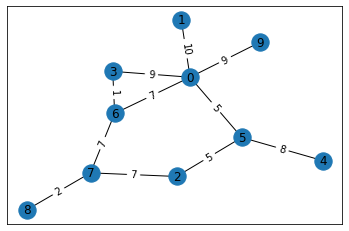

In [6]:
main()